In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [4]:
%store -r X

In [5]:
%store -r y

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X, columns=X.columns)
scaled_df.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,0.09270,0.908,0.365,0.0,1,0.2610,-9.954,0.0942,119.977,4,0.742
1,0.00195,0.942,0.383,0.0,10,0.0922,-8.099,0.5650,100.021,4,0.380
2,0.12800,0.745,0.715,0.0,1,0.1820,-3.368,0.2450,94.513,4,0.342
3,0.02350,0.736,0.622,0.0,6,0.1510,-4.653,0.1330,191.971,4,0.506
4,0.00545,0.885,0.787,0.0,1,0.0669,-6.962,0.3210,146.066,4,0.342


In [7]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=3)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
forest.score(X_test, y_test)

1.0

In [9]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

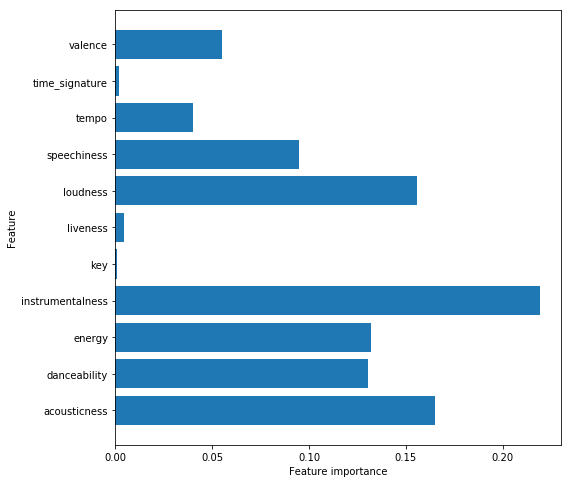

In [10]:
plot_feature_importances(forest)

In [11]:
pred = forest.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15  0  0]
 [ 0 24  0]
 [ 0  0 17]]
             precision    recall  f1-score   support

  Classical       1.00      1.00      1.00        15
    Hip-Hop       1.00      1.00      1.00        24
     Techno       1.00      1.00      1.00        17

avg / total       1.00      1.00      1.00        56

